In [1]:
# @title Plotting functions
import numpy
from numpy.linalg import inv, eig
from math import ceil
from matplotlib import pyplot, ticker, get_backend, rc
from mpl_toolkits.mplot3d import Axes3D
from itertools import cycle

def plot_range_3_by_2_matrix(matrix):

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    # Make data

    x = []
    y = []
    z = []
    for a1 in range(-10, 10, 1):
      for a2 in range(-10, 10, 1):
          vec = a1*matrix[:,0]+a2*matrix[:,1]
          x1, y1, z1 = vec
          x.append(x1)
          y.append(y1)
          z.append(z1)

    ax.scatter(np.array(x), np.array(y), np.array(z), color='b')

def plot_null_2_by_3_matrix(matrix):

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    # Make data

    basis = scipy.linalg.null_space(matrix)
    x = []
    y = []
    z = []
    for a1 in range(-10, 10, 1):
      for a2 in range(-10, 10, 1):

          vec = a1*basis[:,0]
          if basis.shape[1]==2:
            vec += a2*basis[:,1]
          x1, y1, z1 = vec
          x.append(x1)
          y.append(y1)
          z.append(z1)

    ax.scatter(np.array(x), np.array(y), np.array(z), color='b')


_int_backends = ['GTK3Agg', 'GTK3Cairo', 'MacOSX', 'nbAgg',
                 'Qt4Agg', 'Qt4Cairo', 'Qt5Agg', 'Qt5Cairo',
                 'TkAgg', 'TkCairo', 'WebAgg', 'WX', 'WXAgg', 'WXCairo']
_backend = get_backend()   # get current backend name

# shrink figsize and fontsize when using %matplotlib notebook
if _backend in _int_backends:
    fontsize = 4
    fig_scale = 0.75
else:
    fontsize = 5
    fig_scale = 1

grey = '#808080'
gold = '#cab18c'   # x-axis grid
lightblue = '#0096d6'  # y-axis grid
green = '#008367'  # x-axis basis vector
red = '#E31937'    # y-axis basis vector
darkblue = '#004065'

pink, yellow, orange, purple, brown = '#ef7b9d', '#fbd349', '#ffa500', '#a35cff', '#731d1d'

quiver_params = {'angles': 'xy',
                 'scale_units': 'xy',
                 'scale': 1,
                 'width': 0.012}

grid_params = {'linewidth': 0.5,
               'alpha': 0.8}

def set_rc(func):
    def wrapper(*args, **kwargs):
        rc('font', family='serif', size=fontsize)
        rc('figure', dpi=200)
        rc('axes', axisbelow=True, titlesize=5)
        rc('lines', linewidth=1)
        func(*args, **kwargs)
    return wrapper

@set_rc
def plot_vector(vectors, tails=None):
    ''' Draw 2d vectors based on the values of the vectors and the position of their tails.
    
    Parameters
    ----------
    vectors : list.
        List of 2-element array-like structures, each represents a 2d vector.
    
    tails : list, optional.
        List of 2-element array-like structures, each represents the coordinates of the tail
        of the corresponding vector in vectors. If None (default), all tails are set at the
        origin (0,0). If len(tails) is 1, all tails are set at the same position. Otherwise,
        vectors and tails must have the same length.
    
    Examples
    --------
    >>> v = [(1, 3), (3, 3), (4, 6)]
    >>> plot_vector(v)      # draw 3 vectors with their tails at origin
    >>> t = [numpy.array((2, 2))]
    >>> plot_vector(v, t)   # draw 3 vectors with their tails at (2,2)
    >>> t = [[3, 2], [-1, -2], [3, 5]]
    >>> plot_vector(v, t)   # draw 3 vectors with 3 different tails

    '''   
    vectors = numpy.array(vectors)
    assert vectors.shape[1] == 2, "Each vector should have 2 elements."  
    if tails is not None:
        tails = numpy.array(tails)
        assert tails.shape[1] == 2, "Each tail should have 2 elements."
    else:
        tails = numpy.zeros_like(vectors)
    
    # tile vectors or tails array if needed
    nvectors = vectors.shape[0]
    ntails = tails.shape[0]
    if nvectors == 1 and ntails > 1:
        vectors = numpy.tile(vectors, (ntails, 1))
    elif ntails == 1 and nvectors > 1:
        tails = numpy.tile(tails, (nvectors, 1))
    else:
        assert tails.shape == vectors.shape, "vectors and tail must have a same shape"

    # calculate xlimit & ylimit
    heads = tails + vectors
    limit = numpy.max(numpy.abs(numpy.hstack((tails, heads))))
    limit = numpy.ceil(limit * 1.2)   # add some margins
    
    figsize = numpy.array([2,2]) * fig_scale
    figure, axis = pyplot.subplots(figsize=figsize)
    axis.quiver(tails[:,0], tails[:,1], vectors[:,0], vectors[:,1], color=darkblue, 
                  angles='xy', scale_units='xy', scale=1)
    axis.set_xlim([-limit, limit])
    axis.set_ylim([-limit, limit])
    axis.set_aspect('equal')

    # if xticks and yticks of grid do not match, choose the finer one
    xticks = axis.get_xticks()
    yticks = axis.get_yticks()
    dx = xticks[1] - xticks[0]
    dy = yticks[1] - yticks[0]
    base = max(int(min(dx, dy)), 1)   # grid interval is always an integer
    loc = ticker.MultipleLocator(base=base)
    axis.xaxis.set_major_locator(loc)
    axis.yaxis.set_major_locator(loc)
    axis.grid(True, **grid_params)
    
    # show x-y axis in the center, hide frames
    axis.spines['left'].set_position('center')
    axis.spines['bottom'].set_position('center')
    axis.spines['right'].set_color('none')
    axis.spines['top'].set_color('none')

@set_rc
def plot_transformation_helper(axis, matrix, *vectors, unit_vector=True, unit_circle=False, title=None):
    """ A helper function to plot the linear transformation defined by a 2x2 matrix.
    
    Parameters
    ----------
    axis : class matplotlib.axes.Axes.
        The axes to plot on.

    matrix : class numpy.ndarray.
        The 2x2 matrix to visualize.

    *vectors : class numpy.ndarray.
        The vector(s) to plot along with the linear transformation. Each array denotes a vector's
        coordinates before the transformation and must have a shape of (2,). Accept any number of vectors. 
    
    unit_vector : bool, optional.
        Whether to plot unit vectors of the standard basis, default to True.
    
    unit_circle: bool, optional.
        Whether to plot unit circle, default to False.
    
    title: str, optional.
        Title of the plot.

    """
    assert matrix.shape == (2,2), "the input matrix must have a shape of (2,2)"
    grid_range = 20
    x = numpy.arange(-grid_range, grid_range+1)
    X_, Y_ = numpy.meshgrid(x,x)
    I = matrix[:,0]
    J = matrix[:,1]
    X = I[0]*X_ + J[0]*Y_
    Y = I[1]*X_ + J[1]*Y_
    origin = numpy.zeros(1)
        
    # draw grid lines
    for i in range(x.size):
        axis.plot(X[i,:], Y[i,:], c=gold, **grid_params)
        axis.plot(X[:,i], Y[:,i], c=lightblue, **grid_params)
    
    # draw (transformed) unit vectors
    if unit_vector:
        axis.quiver(origin, origin, [I[0]], [I[1]], color=green, **quiver_params)
        axis.quiver(origin, origin, [J[0]], [J[1]], color=red, **quiver_params)

    # draw optional vectors
    color_cycle = cycle([pink, darkblue, orange, purple, brown])
    if vectors:
        for vector in vectors:
            color = next(color_cycle)
            vector_ = matrix @ vector.reshape(-1,1)
            axis.quiver(origin, origin, [vector_[0]], [vector_[1]], color=color, **quiver_params)

    # draw optional unit circle
    if unit_circle:
        alpha =  numpy.linspace(0, 2*numpy.pi, 41)
        circle = numpy.vstack((numpy.cos(alpha), numpy.sin(alpha)))
        circle_trans = matrix @ circle
        axis.plot(circle_trans[0], circle_trans[1], color=red, lw=0.8)

    # hide frames, set xlimit & ylimit, set title
    limit = 4
    axis.spines['left'].set_position('center')
    axis.spines['bottom'].set_position('center')
    axis.spines['left'].set_linewidth(0.3)
    axis.spines['bottom'].set_linewidth(0.3)
    axis.spines['right'].set_color('none')
    axis.spines['top'].set_color('none')
    axis.set_xlim([-limit, limit])
    axis.set_ylim([-limit, limit])
    if title is not None:
        axis.set_title(title)

@set_rc
def plot_linear_transformation(matrix, *vectors, unit_vector=True, unit_circle=False):
    """ Plot the linear transformation defined by a 2x2 matrix using the helper
    function plot_transformation_helper(). It will create 2 subplots to visualize some
    vectors before and after the transformation.
    
    Parameters
    ----------
    matrix : class numpy.ndarray.
        The 2x2 matrix to visualize.

    *vectors : class numpy.ndarray.
        The vector(s) to plot along with the linear transformation. Each array denotes a vector's
        coordinates before the transformation and must have a shape of (2,). Accept any number of vectors.
    
    unit_vector : bool, optional.
        Whether to plot unit vectors of the standard basis, default to True.
    
    unit_circle: bool, optional.
        Whether to plot unit circle, default to False.
    
    """
    figsize = numpy.array([4,2]) * fig_scale
    figure, (axis1, axis2) = pyplot.subplots(1, 2, figsize=figsize)
    plot_transformation_helper(axis1, numpy.identity(2), *vectors, unit_vector=unit_vector, unit_circle=unit_circle, title='Before transformation')
    plot_transformation_helper(axis2, matrix, *vectors, unit_vector=unit_vector, unit_circle=unit_circle, title='After transformation')

@set_rc
def plot_linear_transformations(*matrices, unit_vector=True, unit_circle=False):
    """ Plot the linear transformation defined by a sequence of n 2x2 matrices using the helper
    function plot_transformation_helper(). It will create n+1 subplots to visualize some
    vectors before and after each transformation.

    Parameters
    ----------
    *matrices : class numpy.ndarray.
        The 2x2 matrices to visualize. Accept any number of matrices.
    
    unit_vector : bool, optional.
        Whether to plot unit vectors of the standard basis, default to True.
    
    unit_circle: bool, optional.
        Whether to plot unit circle, default to False.
      
    """
    nplots = len(matrices) + 1
    nx = 2
    ny = ceil(nplots/nx)
    figsize = numpy.array([2*nx, 2*ny]) * fig_scale
    figure, axes = pyplot.subplots(nx, ny, figsize=figsize)

    for i in range(nplots):  # fig_idx 
        if i == 0:
            matrix_trans = numpy.identity(2)
            title = 'Before transformation'
        else:
            matrix_trans = matrices[i-1] @ matrix_trans
            if i == 1:
                title = 'After {} transformation'.format(i)
            else:
                title = 'After {} transformations'.format(i)
        plot_transformation_helper(axes[i//nx, i%nx], matrix_trans, unit_vector=unit_vector, unit_circle=unit_circle, title=title)
    # hide axes of the extra subplot (only when nplots is an odd number)
    if nx*ny > nplots:
        axes[-1,-1].axis('off')
        

In [28]:
#LINEAR ALGEBRA FOR MACHINE LEARNING PART(I)...
# OVERVIEW OF VECTORS....

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math

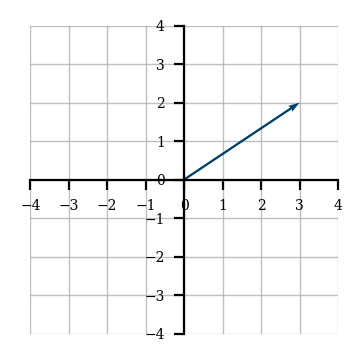

In [2]:
v=[(3,2)]
plot_vector(v)

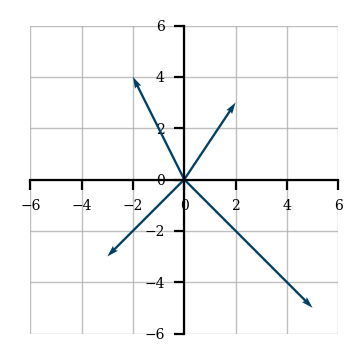

In [6]:
v=[(2,3),(-2,4),(-3,-3),(5,-5)]
plot_vector(v)

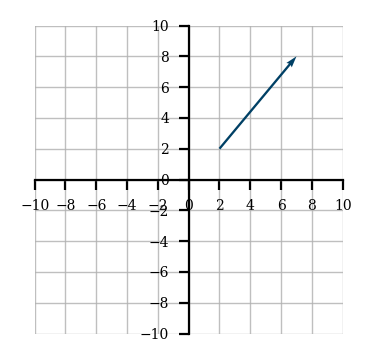

In [7]:
v=[(5,6)]
tail=[(2,2)]
plot_vector(v,tail) #actual (7,8)

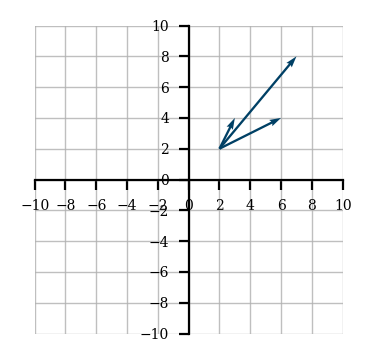

In [9]:
v=[(5,6),(1,2),(4,2)]
tail=[(2,2)]
plot_vector(v,tail) #actual [(7,8),(3,4),(6,4)]

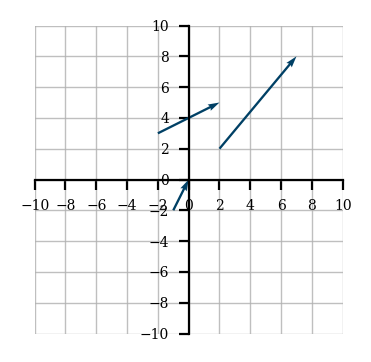

In [11]:
v=[(5,6),(1,2),(4,2)]
tail=[(2,2),(-1,-2), (-2,3)] # all vectors with different tails
plot_vector(v,tail) 

v= [4 6]
L1 NORM;  10
L2 NORM;  7.211102550927978
Squared L2 NORM;  52
Maximum NORM;  6


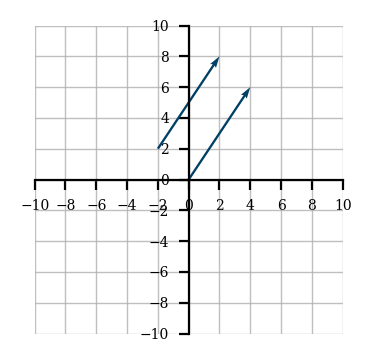

In [15]:
#NORMS---> Magnitude Of A Vector....
#L2 Norm...
tail=np.array([-2,2])
head=np.array([2,8])
v=np.array([head[0]-tail[0], head[1]-tail[1]])   #v=(4,6)

#plotting both vectors...
vectors=[v,v]
tails=[(-2,2),(0,0)]
plot_vector(vectors, tails)

print("v=", v)

#Calculate L1 Norm...
#l1=numpy.linalg.norm(v, ord=1)  #built-in function
l1=np.abs(v[0])+np.abs(v[1])    #methamatical formula
print("L1 NORM; ",l1)

#Calculate L2 Norm...
#l2=numpy.linalg.norm(v, ord=2)  #built-in function
l2= (v[0]**2 + v[1]**2 )**(1/2)    #methamatical formula
print("L2 NORM; ",l2)

#Calculate Squared L2 Norm...
#sq_l2=(numpy.linalg.norm(v, ord=2))**2  #built-in function
sq_l2=v[0]**2 + v[1]**2    #methamatical formula
print("Squared L2 NORM; ",sq_l2)

#Calculate Max Norm...
#max_l=numpy.linalg.norm(v, ord=np.inf)  #built-in function
max_l=np.max([np.abs(v[0]), np.abs(v[1])])  #methamatical form
print("Maximum NORM; ",max_l)

v =  [5 6]
Angle in Radians:  0.8760580505981934
Angle in Degrees (shortest from X-Axis):  50.19442890773481
Counter Clock-Wise Angle in degrees from +ve x-axis:  50.19442890773481


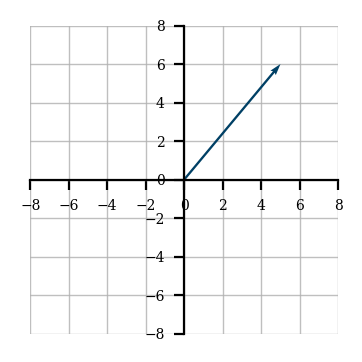

In [24]:
#Calculating Direction of a Vector....
#1ST QUARDRANT
v=np.array([5,6])
print("v = ", v)
rad= math.atan(v[1]/v[0])
deg= rad*(180/math.pi)
print("Angle in Radians: ", rad)
print("Angle in Degrees (shortest from X-Axis): ", deg)
#both coordinates +ve so in 1st Quardrant than measure from +ve x-axis
deg = deg+0
print("Counter Clock-Wise Angle in degrees from +ve x-axis: ", deg)
plot_vector([v])

v =  [-5  6]
Angle in Radians:  -0.8760580505981934
Angle in Degrees (shortest from X-Axis):  -50.19442890773481
Counter Clock-Wise Angle in degrees from +ve x-axis:  129.80557109226518


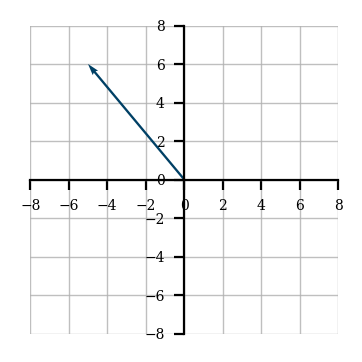

In [25]:
#2nd QUARDRANT
v1=np.array([-5,6])
print("v = ", v1)
rad= math.atan(v1[1]/v1[0])
deg= rad*(180/math.pi)
print("Angle in Radians: ", rad)
print("Angle in Degrees (shortest from X-Axis): ", deg)
#X coordinates -ve so in 2nd Quardrant than measure from -ve x-axis which becomes clockwise sign of angle will ne -ve.
#So, we add 180 in the angle
deg = deg+180
print("Counter Clock-Wise Angle in degrees from +ve x-axis: ", deg)
plot_vector([v1])

v =  [-5 -6]
Angle in Radians:  0.8760580505981934
Angle in Degrees (shortest from X-Axis):  50.19442890773481
Counter Clock-Wise Angle in degrees from +ve x-axis:  230.19442890773482


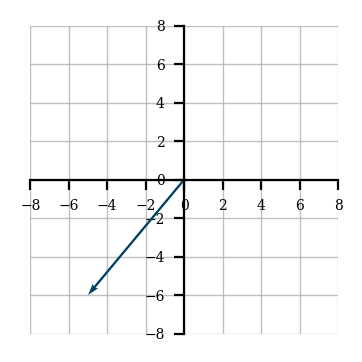

In [26]:
#3rd QUARDRANT
v2=np.array([-5,-6])
print("v = ", v2)
rad= math.atan(v2[1]/v2[0])
deg= rad*(180/math.pi)
print("Angle in Radians: ", rad)
print("Angle in Degrees (shortest from X-Axis): ", deg)
#both coordinates -ve so in 3rd Quardrant than measure from -ve x-axis but counter clockwise sign remains +ve.
#So, Add 180 in angle
deg = deg+180
print("Counter Clock-Wise Angle in degrees from +ve x-axis: ", deg)
plot_vector([v2])

v =  [ 5 -6]
Angle in Radians:  -0.8760580505981934
Angle in Degrees (shortest from X-Axis):  -50.19442890773481
Counter Clock-Wise Angle in degrees from +ve x-axis:  309.8055710922652


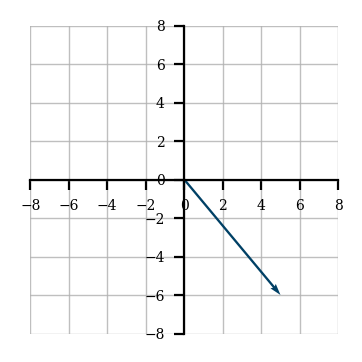

In [28]:
#4th QUARDRANT
v3=np.array([5,-6])
print("v = ", v3)
rad= math.atan(v3[1]/v3[0])
deg= rad*(180/math.pi)
print("Angle in Radians: ", rad)
print("Angle in Degrees (shortest from X-Axis): ", deg)
#Y coordinates -ve so in 4th Quardrant than measure from +ve x-axis which becomes clockwise sign of angle will ne -ve
#So, Add 360 in angle
deg = deg+ 360
print("Counter Clock-Wise Angle in degrees from +ve x-axis: ", deg)
plot_vector([v3])

Fx is : 8.66 N
Fy is : 5.00 N
|F| :  10.0
Angle is 30.00 Degrees


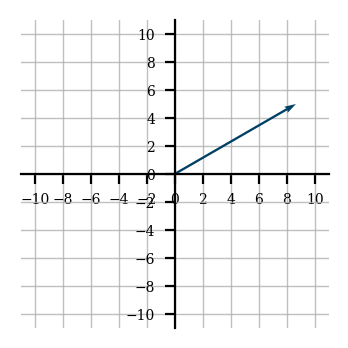

In [31]:
#Components Of 2D --->Vectors...
f=10
theta=30
fx=f* math.cos(theta * math.pi/180) #X-Component of F
fy=f* math.sin(theta * math.pi/180) #Y-Component of F
print("Fx is : %.2f" %fx, "N")
print("Fy is : %.2f" %fy, "N")

#Verification by Calculating Norm
l2=np.linalg.norm([fx,fy], ord=2)
print("|F| : ", l2)

#Verification by calculating Angle...
rad = math.atan(fy/fx)
deg =rad * (180/math.pi)
print("Angle is %.2f" %deg, "Degrees")
plot_vector([(fx, fy)])

In [33]:
#Components Of 3D --->Vectors...
f=8.2463
thetaX=60.98
thetaY=43.3
thetaZ=60.98
fx=f* math.cos(thetaX * math.pi/180) #X-Component of F
fy=f* math.cos(thetaY * math.pi/180) #Y-Component of F
fz=f* math.cos(thetaZ * math.pi/180) #Y-Component of F
print("Fx is : %.2f" %fx, "N")
print("Fy is : %.2f" %fy, "N")
print("F zis : %.2f" %fz, "N")

#Verification by Calculating Norm
l2=np.linalg.norm([fx,fy,fz], ord=2)
print("|F| : ", l2)

Fx is : 4.00 N
Fy is : 6.00 N
F zis : 4.00 N
|F| :  8.24764445334653


U :  [ 6 -1]
V :  [-3  4]
U + V:  [3 3]


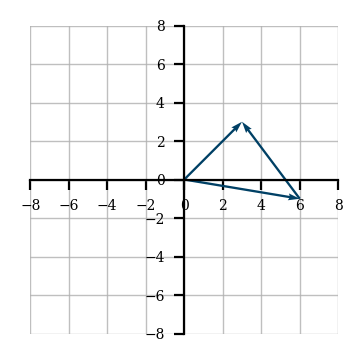

In [34]:
#VECTOR OPERATION...
# 1. ADDITION OF VECTORS...
# vector 1 head at (5,2) an tail (-1,3)  and 2nd vector tail(1,-2) , head (-2, 2)
u= np.array([5-(-1), 2-3])
v = np.array([-2-1, 2-(-2)])
print("U : ", u)
print("V : ", v)
r=u+v
print("U + V: ", r)

vectors=[u, v, r]
tails=[(0,0), u, (0,0)]
plot_vector(vectors, tails)


Ux is : 8.66 N
Uy is : 5.00 N
Vx is : 10.00 N
Vy is : 17.32 N
Result R:  [18.66025404 22.32050808]
|R| :  29.093129111764092
Angle of R 50.10390936101709


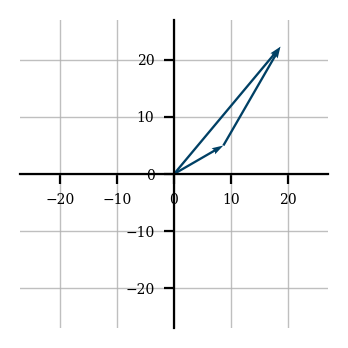

In [35]:
#Example#2
U=10
U_theta=30
V=20
V_theta=60
Ux=U* math.cos(U_theta * math.pi/180) #X-Component of U
Uy=U* math.sin(U_theta * math.pi/180) #Y-Component of Y
print("Ux is : %.2f" %Ux, "N")
print("Uy is : %.2f" %Uy, "N")

Vx=V* math.cos(V_theta * math.pi/180) #X-Component of V
Vy=V* math.sin(V_theta * math.pi/180) #Y-Component of V
print("Vx is : %.2f" %Vx, "N")
print("Vy is : %.2f" %Vy, "N")

#ADDING
Rx= Ux + Vx
Ry= Uy + Vy
R = np.array([Rx, Ry])
print("Result R: ", R)

#Calculating Magnitude...
mag = np.linalg.norm(R, ord=2)
print("|R| : ", mag)

#Calculating Angle
radR= math.atan(R[1]/R[0])
#degR = radR* (180/math.pi)
degR = math.degrees(radR) #converting radians in degrees ---> 1st Quard so nothing to add
print("Angle of R", degR)

#PLOTTING...
vec=[(Ux,Uy), (Vx, Vy), (Rx, Ry)]
ta=[(0,0), (Ux, Uy), (0,0)]
plot_vector(vec, ta)

A:  [-4 -6]
|a| :  7.211102550927978
Angle of a: 236.30993247402023
B:  [2. 3.]
|b| :  3.605551275463989
Angle of a: 236.30993247402023


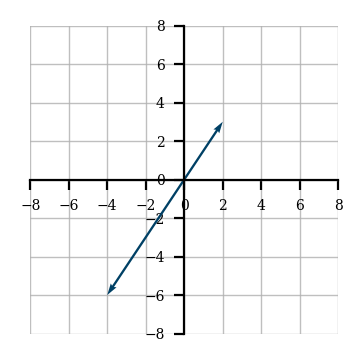

In [36]:
# 2. SCALING OF VECTORS...
a=np.array([-4,-6])
print("A: ", a)
mag=np.linalg.norm(a, ord=2)
print("|a| : ", mag)
ang = math.degrees(math.atan(a[1]/a[0])) #as coordinates in 3rd quardrant add 180
ang = ang + 180
print("Angle of a:", ang)

#Scaling...
b = -0.5 * a

print("B: ", b)
magb=np.linalg.norm(b, ord=2)
print("|b| : ", magb)
angb = math.degrees(math.atan(b[1]/b[0])) #as coordinates in 3rd quardrant add 180
angb = angb + 180
print("Angle of a:", ang)


#Plotting
vectors=[a, b]
plot_vector(vectors)

A:  [1 1]
|a| :  1.4142135623730951
Angle of a: 45.0
B:  [3 3]
|b| :  4.242640687119285
Angle of a: 45.0


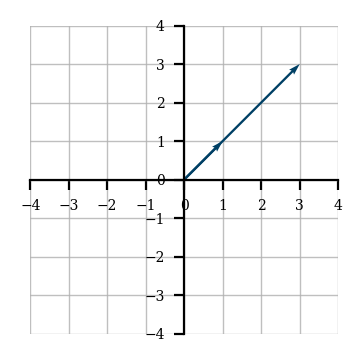

In [39]:
#Example:
a=np.array([1,1])
print("A: ", a)
mag=np.linalg.norm(a, ord=2)
print("|a| : ", mag)
ang = math.degrees(math.atan(a[1]/a[0])) #as coordinates in 3rd quardrant add 180
ang = ang + 0
print("Angle of a:", ang)

#Scaling...
b = 3 * a

print("B: ", b)
magb=np.linalg.norm(b, ord=2)
print("|b| : ", magb)
angb = math.degrees(math.atan(b[1]/b[0])) #as coordinates in 1st Quard so no addition
angb = angb + 0
print("Angle of a:", ang)


#Plotting
vectors=[a, b]
plot_vector(vectors)

V: [3 2] magnitude:  3.605551275463989
V hat:  [0.8320502943378437, 0.5547001962252291] Magnitude:  1.0


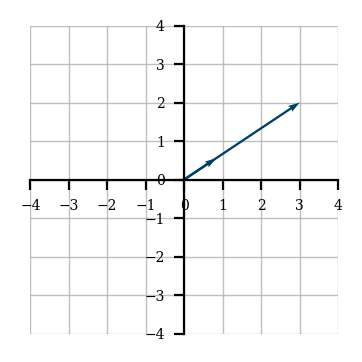

In [41]:
#UNIT VECTORS....
# vector with same direction but magnitude of one.
# vhat = v/l2 norm of v

v = np.array((3,2))
v_mag= np.linalg.norm(v, ord=2)

v_hat=[v[0]/v_mag, v[1]/v_mag]
vhat_mag=np.linalg.norm(v_hat, ord=2)

print("V:", v, "magnitude: ", v_mag)
print("V hat: ", v_hat, "Magnitude: ", vhat_mag)

vectors=[v, v_hat]
plot_vector(vectors)

In [42]:
#Example: Unit Vector of 3d vector
v=np.array((12,3,-4))
v_mag= np.linalg.norm(v, ord=2)

v_hat=[v[0]/v_mag, v[1]/v_mag, v[2]/v_mag]
vhat_mag=np.linalg.norm(v_hat, ord=2)

print("V:", v, "magnitude: ", v_mag)
print("V hat: ", v_hat, "Magnitude: ", vhat_mag)


V: [12  3 -4] magnitude:  13.0
V hat:  [0.9230769230769231, 0.23076923076923078, -0.3076923076923077] Magnitude:  1.0


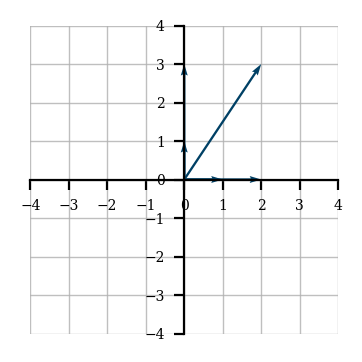

In [43]:
#BASIS VECTORS...
#Unit vector with specified direction along x, y or z-axis..
# i-hat ---> unit vector along +ve x-axis with magnitude "1"
# j-hat ---> unit vector along +ve y-axis with magnitude "1"
# z-hat ---> unit vector along +ve z-axis with magnitude "1"
i=np.array((1,0))
j=np.array((0,1))

vec=2*i + 3*j
vectors=[i, j, 2*i , 3*j, vec]
plot_vector(vectors)

Text(0.5, 1.0, 'Hundred Random Vectors')

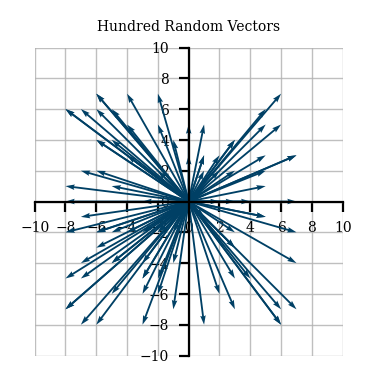

In [45]:
#LINEAR COMBINATIONS AND SPAN...
i=np.array((1,0))
j=np.array((0,1))

vectors=[]
for _ in range(100):
    m= np.random.randint(-8,8)
    n=np.random.randint(-8,8)
    vectors.append(m*i+n*j)
    
plot_vector(vectors)
plt.title("Hundred Random Vectors")

Text(0.5, 1.0, 'Thouasand Random Vectors')

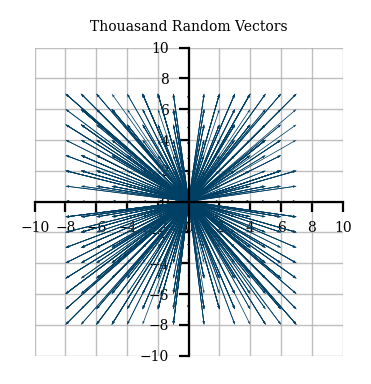

In [46]:
i=np.array((1,0))
j=np.array((0,1))

vectors=[]
for _ in range(1000):
    m= np.random.randint(-8,8)
    n=np.random.randint(-8,8)
    vectors.append(m*i+n*j)
    
plot_vector(vectors)
plt.title("Thouasand Random Vectors")

Text(0.5, 1.0, 'Hundred Random Vectors')

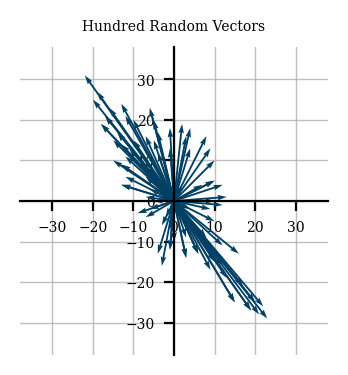

In [48]:
i=np.array((-2,1))
j=np.array((1,-3))

vectors=[]
for _ in range(100):
    m= np.random.randint(-8,8)
    n=np.random.randint(-8,8)
    vectors.append(m*i+n*j)
    
plot_vector(vectors)
plt.title("Hundred Random Vectors")

Text(0.5, 1.0, 'Hundred Random Vectors')

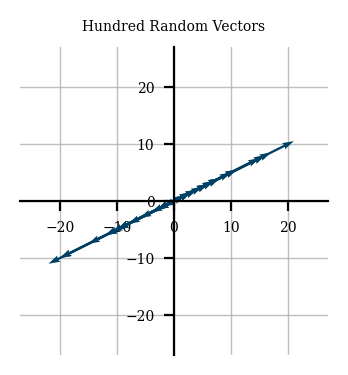

In [49]:
i=np.array((-2,-1))
j=np.array((1, 0.5))

vectors=[]
for _ in range(50):
    m= np.random.randint(-8,8)
    n=np.random.randint(-8,8)
    vectors.append(m*i+n*j)
    
plot_vector(vectors)
plt.title("Hundred Random Vectors")
#Here given two vectors are the scalar multiple of ecah other so lie on the same line (LINEARLY DEPENDENT VECTORS) 

In [67]:
#VECTOR TO VECTOR MULTIPLICATION..... 
#DOT PRODUCT...

# a.b = |a||b| cos0
# 0 = cos-1 (a.b/|a||b|)

A=np.array([2,2,-1])
B=np.array([5,-3,2])
print("A :", A)
print("B : ",B)


#magnitudes..
magA = np.linalg.norm(A, ord=2)
magB = np.linalg.norm(B, ord=2)
print("|A| :", magA)
print("|B| : ", magB)

#DOT product...
#AB = np.dot(A, B)
#AB = A[0]*B[0] + A[1]*B[1] + A[2]*B[2]
AB = A.dot(B)
print("A.B =", AB)

rad = math.acos(AB/(magA*magB))
deg = math.degrees(rad)
print("angle: ", deg)

print("A.B = |A||B|cos0 : ", magA*magB*math.cos(rad))

A : [ 2  2 -1]
B :  [ 5 -3  2]
|A| : 3.0
|B| :  6.164414002968976
A.B = 2
angle:  83.79145537381416
A.B = |A||B|cos0 :  1.9999999999999987


In [69]:
#CROSS PRODUCT....
# a*b = |a||b|sin0
# 0 = sin-1 (|a*b|/(|a|*|b|)

A=np.array([3,5,-7])
B=np.array([2,-6,4])
print("A :", A)
print("B : ",B)

#Cross product...
AB = np.cross(A, B)
print("A*B =", AB)

#magnitudes..
magA = np.linalg.norm(A, ord=2)
magB = np.linalg.norm(B, ord=2)
magAB = np.linalg.norm(AB, ord=2)
print("|A| :", magA)
print("|B| : ", magB)
print("|A*B| : ", magAB)

rad = math.asin(magAB/(magA*magB))
deg = math.degrees(rad)
print("angle: ", deg)

A : [ 3  5 -7]
B :  [ 2 -6  4]
A*B = [-22 -26 -28]
|A| : 9.1104335791443
|B| :  7.483314773547883
|A*B| :  44.090815370097204
angle:  40.29462137837708


In [72]:
#ORTHOGONAL AND ORTHONORMAL VECTORS...
#two vectors having an angle of 90 between them are orthogonal vectors
#their dot product will be 0 ---> a.b = |a||b|cos90 = 0
#their cros product will be equal to their magnitudes produt ----> a*b = |a||b|sin90 = |a||b|

A = np.array([6,-2,-1])
B = np.array([2,5,2])
print("A :", A)
print("B : ",B)

AB = A.dot(B)
print("A.B =", AB)

#magnitudes..
magA = np.linalg.norm(A, ord=2)
magB = np.linalg.norm(B, ord=2)
rad = math.acos(AB/(magA*magB))
deg = math.degrees(rad)
print("angle: ", deg)

#Proof Of Concept...
lhs = magA * magB * math.sin(rad)
rhs = magA * magB
print("|A||B|sin90: ", lhs)
print("|A||B|: ", rhs)

A : [ 6 -2 -1]
B :  [2 5 2]
A.B = 0
angle:  90.0
|A||B|sin90:  36.78314831549904
|A||B|:  36.78314831549904


In [74]:
#MATRICES....
A= np.array([[1,2,3],[4,5,6],[7,8,9]])
print("A :\n", A)
print("Upper Trinagle: \n", np.triu(A))
print("Lower Trinagle: \n", np.tril(A))

A :
 [[1 2 3]
 [4 5 6]
 [7 8 9]]
Upper Trinagle: 
 [[1 2 3]
 [0 5 6]
 [0 0 9]]
Lower Trinagle: 
 [[1 0 0]
 [4 5 0]
 [7 8 9]]


In [77]:
#Symmetric Matrice...
B= np.array([[4,1,7],[1,-3,5], [7 ,5,2]])
print("A :\n", B)
print("A's Trianspose \n", np.transpose(B))
print("A's Trianspose \n", B.T)

A :
 [[ 4  1  7]
 [ 1 -3  5]
 [ 7  5  2]]
A's Trianspose 
 [[ 4  1  7]
 [ 1 -3  5]
 [ 7  5  2]]
A's Trianspose 
 [[ 4  1  7]
 [ 1 -3  5]
 [ 7  5  2]]


In [78]:
#Zero Matrix...
z=np.zeros((3,2), dtype=np.int16)
print(z)

[[0 0]
 [0 0]
 [0 0]]


In [79]:
#One Matrix...
z=np.ones((3,2), dtype=np.int16)
print(z)

[[1 1]
 [1 1]
 [1 1]]


In [82]:
#Row Matrix...
r = np.array([2,1,4])
print(r.ndim)
print(r.dtype)
print(r.shape)

1
int32
(3,)


In [83]:
#Col Matrix...
r = np.array([[2],[1],[4]])
print(r.ndim)
print(r.dtype)
print(r.shape)

2
int32
(3, 1)


In [84]:
#Diagnol Matrix...
A = np.random.randint(0,10,size=(4,4))
print("A :\n", A)
d=np.diag(A)
print("diagnol Vector \n", d)
D=np.diag(d)
print("diagnol Matrix \n", D)

A :
 [[7 3 1 6]
 [3 9 9 3]
 [5 0 6 0]
 [6 5 6 7]]
diagnol Vector 
 [7 9 6 7]
diagnol Matrix 
 [[7 0 0 0]
 [0 9 0 0]
 [0 0 6 0]
 [0 0 0 7]]


In [89]:
#Identity Matrix...
I4 = np.eye(4,4)
print("I4: \n", I4)

I4: 
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [90]:
I4 = np.eye(4,4,1, np.int8)
print("I4: \n", I4)

I4: 
 [[0 1 0 0]
 [0 0 1 0]
 [0 0 0 1]
 [0 0 0 0]]


In [91]:
I4 = np.eye(4,4,-1, np.int8)
print("I4: \n", I4)

I4: 
 [[0 0 0 0]
 [1 0 0 0]
 [0 1 0 0]
 [0 0 1 0]]


In [92]:
#Scalar Matrix...
I4 = np.eye(4,4)
print("I4: \n", I4*-2)

I4: 
 [[-2. -0. -0. -0.]
 [-0. -2. -0. -0.]
 [-0. -0. -2. -0.]
 [-0. -0. -0. -2.]]


In [93]:
#Identity Matrix...
I4 = np.eye(3,3)
print("I4: \n", I4*5)

I4: 
 [[5. 0. 0.]
 [0. 5. 0.]
 [0. 0. 5.]]


In [96]:
#ORTHOGONAL MATRICES...
#Called Queen Matrices..
#row and col vectors are perpendicular with magnitude "1"...
Q1 = np.array([[1,0,0],[0,-1,0],[0,0,1]])
Q2 = np.array([[-1,0,0],[0,1,0],[0,0,1]])
print("Q1: \n", Q1)
print("Q2 : \n", Q2)
print("Q1.Q2: \n", Q1.dot(Q2))
print("Q2 transpose: \n", Q2.T)
print("Q1.Q1T: \n", Q1.dot(Q1.T))

Q1: 
 [[ 1  0  0]
 [ 0 -1  0]
 [ 0  0  1]]
Q2 : 
 [[-1  0  0]
 [ 0  1  0]
 [ 0  0  1]]
Q1.Q2: 
 [[-1  0  0]
 [ 0 -1  0]
 [ 0  0  1]]
Q2 transpose: 
 [[-1  0  0]
 [ 0  1  0]
 [ 0  0  1]]
Q1.Q1T: 
 [[1 0 0]
 [0 1 0]
 [0 0 1]]


In [98]:
#MATRIX OPERATIONS...
# 1. ADDITION....
A = np.array([[1,2,3],[4,5,6],[7,8,9]])
B = np.array([[2,4,6],[1,3,5],[8,7,9]])
C = A + B
print("A : \n", A)
print("B : \n", B)
print("A+B : \n", C)

A : 
 [[1 2 3]
 [4 5 6]
 [7 8 9]]
B : 
 [[2 4 6]
 [1 3 5]
 [8 7 9]]
A+B : 
 [[ 3  6  9]
 [ 5  8 11]
 [15 15 18]]


In [99]:
# 2. SCALAR MULTIPLICATION....
b=2
D= b * B
print("2*B : \n", D)

2*B : 
 [[ 4  8 12]
 [ 2  6 10]
 [16 14 18]]


In [101]:
# 3. MATRIX MULTIPLICATION....
# A) HADAMARD PRODUCT ---> element wise multiplication ---> a*b
print("A : \n", A)
print("B : \n", B)
print("A*B : \n", A*B)

A : 
 [[1 2 3]
 [4 5 6]
 [7 8 9]]
B : 
 [[2 4 6]
 [1 3 5]
 [8 7 9]]
A*B : 
 [[ 2  8 18]
 [ 4 15 30]
 [56 56 81]]


In [103]:
# B) DOT PRODUCT ---> col in 1st matrix == rows in 2nd matrix
#    a@b  OR np.dot()
A =np.random.randint(1,9,(3,2))
B =np.random.randint(1,9,(2,2))
print("A : \n", A)
print("B : \n", B)
print("A*B : \n", A@B)
print("A*B : \n", np.dot(A,B))

A : 
 [[4 4]
 [3 4]
 [1 5]]
B : 
 [[2 3]
 [8 1]]
A*B : 
 [[40 16]
 [38 13]
 [42  8]]
A*B : 
 [[40 16]
 [38 13]
 [42  8]]


In [105]:
# 4) Matrix Vector Multiplication ---> col in matrix == Elements in Vector
#    a@b  OR np.dot(matrix, vector)
A =np.random.randint(1,9,(3,2))
v=np.array([3,2])
print("Matrix : \n", A)
print("Vector : \n", v)
print("A*v: \n", A@v)
print("A*v : \n", np.dot(A,v))

Matrix : 
 [[6 1]
 [7 5]
 [8 2]]
Vector : 
 [3 2]
A*v: 
 [20 31 28]
A*v : 
 [20 31 28]


In [106]:
#FORBENIOUS NORM....
print("Matrix : \n", A)
print("Forbeniuous Norm : \n", np.linalg.norm(A, ord=None))

Matrix : 
 [[6 1]
 [7 5]
 [8 2]]
Forbeniuous Norm : 
 13.379088160259652


In [107]:
#TRANSPOSE OF MATRIX....
print("Matrix : \n", A)
print("Transpose of A : \n", A.T)

Matrix : 
 [[6 1]
 [7 5]
 [8 2]]
Transpose of A : 
 [[6 7 8]
 [1 5 2]]


In [113]:
#DETERMINANT OF A MATRIX...
d= np.array([[3,6],[-4,8]])
print("D : \n", d)
print("Determinant of D: \n", np.linalg.det(d))

d3= np.array([[3,6,4],[-4,8,-2],[3,-4,9]])
print("D3 : \n", d3)
print("Determinant of D: \n", np.linalg.det(d3))

D : 
 [[ 3  6]
 [-4  8]]
Determinant of D: 
 47.999999999999986
D3 : 
 [[ 3  6  4]
 [-4  8 -2]
 [ 3 -4  9]]
Determinant of D: 
 339.99999999999983


In [117]:
#INVERSE OF A MATRIX...
d3I= np.linalg.inv(d3)
print("Inverse of D3: \n", d3I)
print("D . D3I: \n", d3.dot(d3I).astype(int))

Inverse of D3: 
 [[ 0.18823529 -0.20588235 -0.12941176]
 [ 0.08823529  0.04411765 -0.02941176]
 [-0.02352941  0.08823529  0.14117647]]
D . D3I: 
 [[1 0 0]
 [0 1 0]
 [0 0 1]]


In [120]:
#TRACE OF A MATRIX ---> sum of all diagnol elements...
print("Trace: \n", np.trace(d3))

#Trace of a matrix and its transpose id same
print("Trace: \n", np.trace(d3.T))


Trace: 
 20
Trace: 
 20


In [122]:
#RANK OF MATRIX ----> number of linearly independent rows and cols in a matrix
print(A)
print("Trace: \n", np.linalg.matrix_rank(A))

[[6 1]
 [7 5]
 [8 2]]
Trace: 
 2


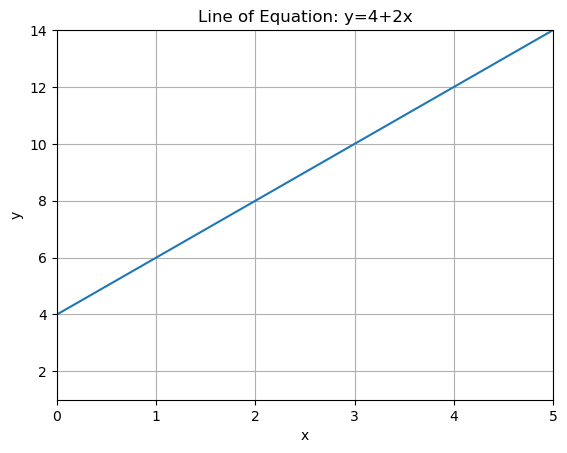

In [3]:
#SOLVING SYSTEM OF LINEAR EQUATIONS....
x=np.array([0,5])
y= 4+ 2*x


fig,ax = plt.subplots()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Line of Equation: y=4+2x")
ax.set_xlim([0,5])
ax.set_ylim([1,14])
ax.plot(x,y)
ax.grid("True")

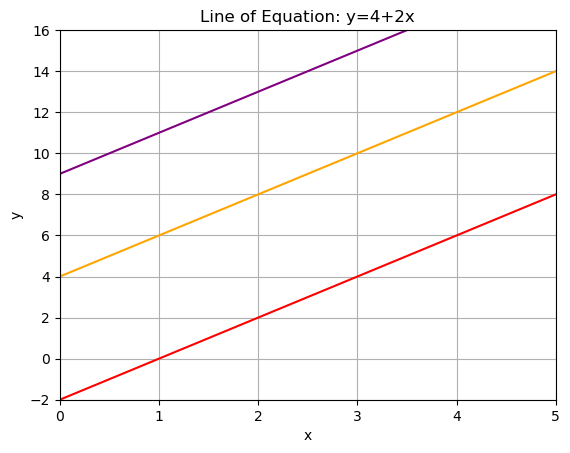

In [6]:
#SLOPE SAME Y-INTERCEPT DIFFERENT....
x=np.array([0,5])
y= 4+ 2*x
y1= -2 + 2* x
y2= 9 + 2*x

fig,ax = plt.subplots()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Line of Equation: y=4+2x")
ax.set_xlim([0,5])
ax.set_ylim([-2,16])
ax.plot(x,y, c='orange')
ax.plot(x,y1, c='red')
ax.plot(x,y2, c='purple')
ax.grid("True")

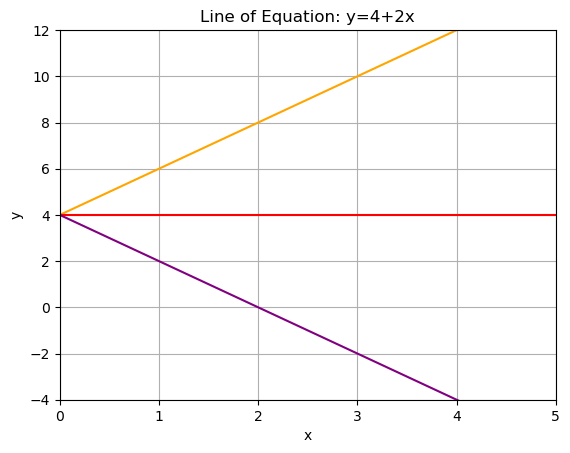

In [12]:
#SLOPE DIFFERENT Y-INTERCEPT SAME....
x=np.array([0,5])
y= 4+ 2*x
y1=4 + 0* x
y2=4 + -2*x

fig,ax = plt.subplots()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Line of Equation: y=4+2x")
ax.set_xlim([0,5])
ax.set_ylim([-4,12])
ax.plot(x,y, c='orange')
ax.plot(x,y1, c='red')
ax.plot(x,y2, c='purple')
ax.grid("True")

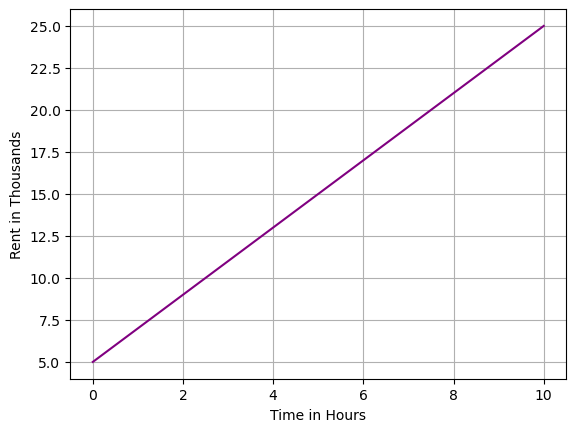

In [14]:
#Example:
x=np.linspace(0,10,5)
y= 5 + 2*x
fig,ax = plt.subplots()
plt.xlabel("Time in Hours")
plt.ylabel("Rent in Thousands")
ax.plot(x,y, c="purple")
ax.grid("True")

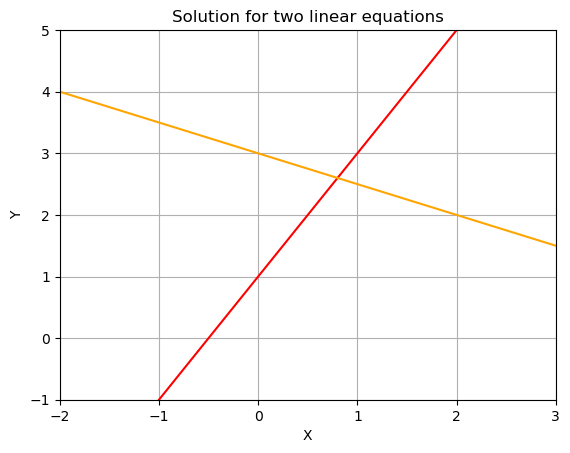

In [16]:
#SOLVING SYSTEM OF LINEAR EQUATION...
#USING GRAPHING STRATERGY....

# 1. single solution
x = np.linspace(-10, 10, 1000)
y= 1 + 2*x
y1= 3 - 0.5*x
fig, ax = plt.subplots()
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Solution for two linear equations")
ax.set_xlim([-2, 3])
ax.set_ylim([-1, 5])
ax.plot(x, y , c='red')
ax.plot(x, y1, c='orange')
ax.grid(True)  #SINGLE INTERSECTION point MEANS this system have a solution

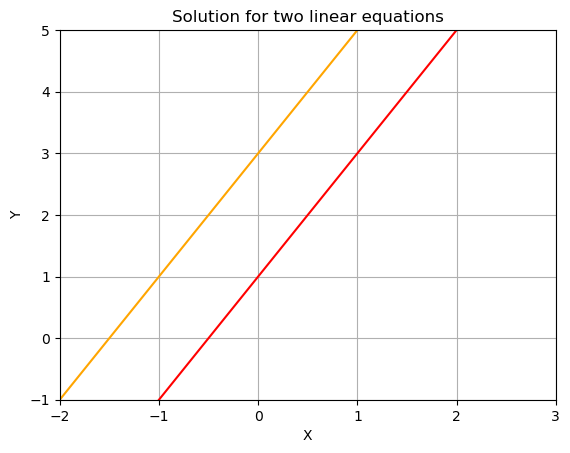

In [17]:
# 2. No solution
x = np.linspace(-10, 10, 1000)
y= 1 + 2*x
y1=3 + 2*x
fig, ax = plt.subplots()
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Solution for two linear equations")
ax.set_xlim([-2, 3])
ax.set_ylim([-1, 5])
ax.plot(x, y , c='red')
ax.plot(x, y1, c='orange')
ax.grid(True)  #NO INTERSECTION point MEANS this system have NO solution

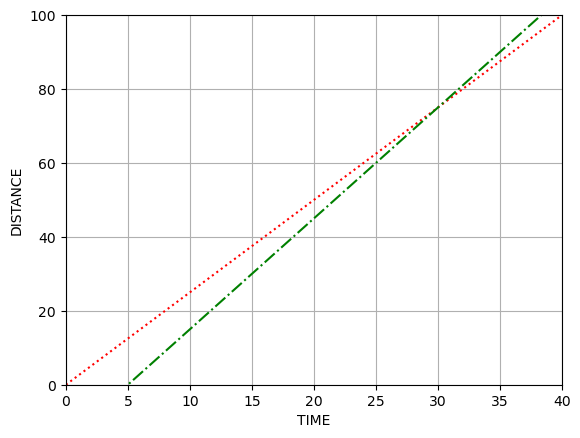

In [28]:
#Example:
t = np.linspace(0, 100, 100)
d=2.5*t
d1=3*(t-5)
fig, ax = plt.subplots()
plt.xlabel("TIME")
plt.ylabel("DISTANCE")
ax.set_xlim([0, 40])
ax.set_ylim([0, 100])
ax.plot(t, d , 'r:')
ax.plot(t, d1, 'g-.')
ax.grid(True) 

In [29]:
#SOLVING SYSYTEM OF LINEAR EQUATIONS USING MATRIX INVERSION...
#LIMITATION:  1--> Square Matrix  2-->Non-Singular Matrix (det not zero)
# 1. example
A=np.array([[1,-1/2],[-1/2,1]])
b=np.array([1,-1])
Ainv=np.linalg.inv(A)
res= np.dot(Ainv, b)
res1= np.linalg.solve(A, b)
print("X : ", res)
print("X-->solve: ", res1)

X :  [ 0.66666667 -0.66666667]
X-->solve:  [ 0.66666667 -0.66666667]


In [30]:
# 2. example
A=np.array([[1,2,3],[2,-3,-5],[-6,-8,1]])
b=np.array([-7,9,-22])
Ainv=np.linalg.inv(A)
#res= np.dot(Ainv, b)
res= Ainv.dot(b)
res1= np.linalg.solve(A, b)
print("X : ", res)
print("X-->solve: ", res1)

X :  [-1.  3. -4.]
X-->solve:  [-1.  3. -4.]


In [31]:
#CATEGORIES OF EQUATIONS...
#1. OVERDETERMINED
    #A. Consistent Overdetermined (Unique) Solution.
    #B. Consistent Overdetermined (Infinite) Solution.
    #C. In-Consistent Overdetermined (No) Solution.
#2. UNDERDETERMINED  (No Unique Solution)
    #A. Consistent Overdetermined (Infinite) Solution.
    #B. In-Consistent Overdetermined (No) Solution.

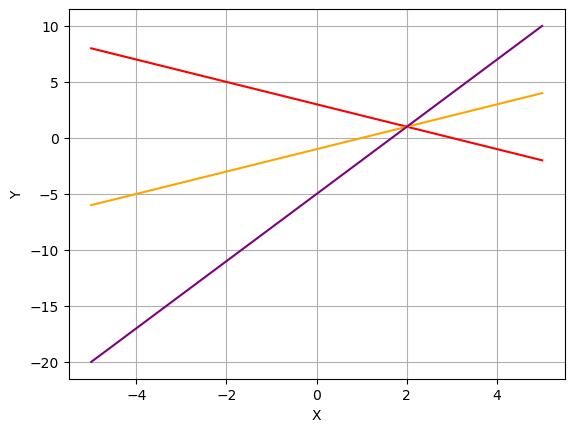

In [32]:
#1. OVERDETERMINED
    #A. Consistent Overdetermined (Unique) Solution.
x = np.linspace(-5, 5, 5)
y= 3 - x
y1=-1 + x
y2=-5+ 3*x
fig, ax = plt.subplots()
plt.xlabel("X")
plt.ylabel("Y")
ax.plot(x, y , c='red')
ax.plot(x, y1, c='orange')
ax.plot(x, y2, c='purple')
ax.grid(True) 

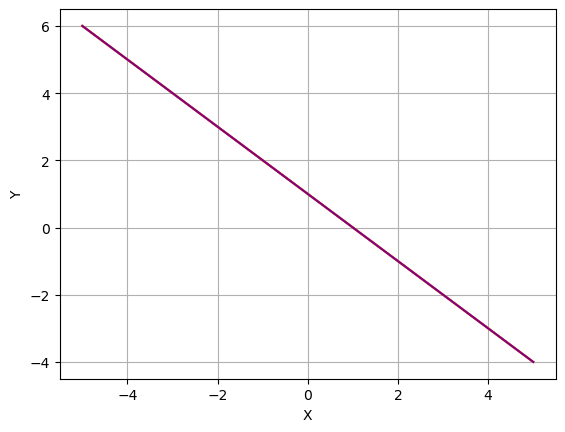

In [34]:
#1. OVERDETERMINED
    #B. Consistent Overdetermined (Infinite) Solution.
x = np.linspace(-5, 5, 5)
y= 1 - x
y1=2/2 - (2/2) *x
y2=3/3 - (3/3)*x
fig, ax = plt.subplots()
plt.xlabel("X")
plt.ylabel("Y")
ax.plot(x, y , c='red')
ax.plot(x, y1, c='orange')
ax.plot(x, y2, c='purple')
ax.grid(True) 

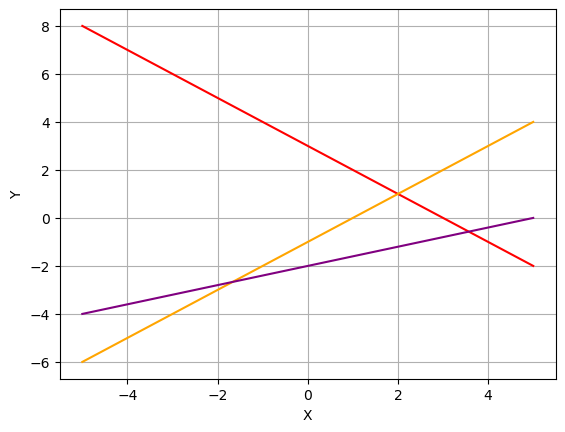

In [35]:
#1. OVERDETERMINED
    #C. In-Consistent Overdetermined (No) Solution.
x = np.linspace(-5, 5, 5)
y= 3 - x
y1= -1 + x
y2= -2 + (2/5)*x
fig, ax = plt.subplots()
plt.xlabel("X")
plt.ylabel("Y")
ax.plot(x, y , c='red')
ax.plot(x, y1, c='orange')
ax.plot(x, y2, c='purple')
ax.grid(True) 

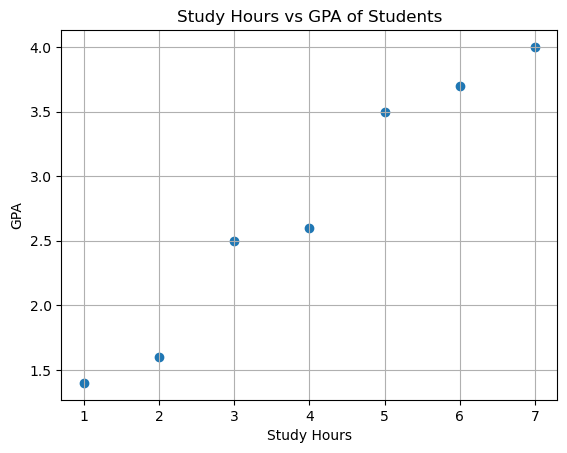

In [36]:
#SOLVING InConsistent Overdetermined System of Linear Equations Using Least Square...
sh = np.array([1, 2, 3, 4, 5, 6, 7.])               # study hours 
gpa = np.array([1.4, 1.6, 2.5, 2.6, 3.5, 3.7, 4.0])   # gpa
fig, ax = plt.subplots()
plt.title("Study Hours vs GPA of Students")
plt.xlabel("Study Hours")
plt.ylabel("GPA")
ax.scatter(sh,gpa)
plt.grid(True)

In [37]:
#BSET FIT LINE....
#1. option
x = np.array([1, 2, 3, 4, 5, 6, 7])
y = np.array([1.4, 1.6, 2.5, 2.6, 3.5, 3.7, 4.0])
N = 7 
xbar = sum(x)/N
ybar = sum(y)/N

b1 = (sum((x-xbar)*(y-ybar)))/(sum((x-xbar)**2))
b0 = ybar - b1*xbar
print("Slope: ", b1)
print("Y-intercept: ", b0)


Slope:  0.4642857142857143
Y-intercept:  0.8999999999999999


In [39]:
#2. option
x = np.array([1, 2, 3, 4, 5, 6, 7])
y = np.array([1.4, 1.6, 2.5, 2.6, 3.5, 3.7, 4.0])
cov_mat=np.cov(x,y)
xbar = sum(x)/N
ybar = sum(y)/N
b1 = cov_mat[0,1]/cov_mat[0,0]
b0 = ybar - b1*xbar
print("Slope: ", b1)
print("Y-intercept: ", b0)


Slope:  0.4642857142857143
Y-intercept:  0.8999999999999999


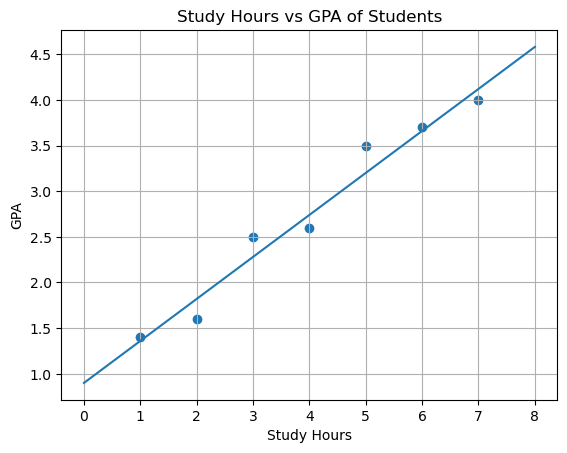

In [40]:
#RE PLOT WITH DETERMINED EQUATION...
# y = 0.9 + 0.46x
sh = np.array([1, 2, 3, 4, 5, 6, 7.])               # study hours 
gpa = np.array([1.4, 1.6, 2.5, 2.6, 3.5, 3.7, 4.0])   # gpa
fig, ax = plt.subplots()
plt.title("Study Hours vs GPA of Students")
plt.xlabel("Study Hours")
plt.ylabel("GPA")
ax.scatter(sh,gpa)

x2=np.linspace(0,8,10)
b0=0.9
b1=0.46
y2=b0+b1*x2
ax.plot(x2,y2)
plt.grid(True)

In [41]:
#R2 SCORE....
x = np.array([1, 2, 3, 4, 5, 6, 7])       
y = np.array([1.4, 1.6, 2.5, 2.6, 3.5, 3.7, 4.0])  
yhat = b0 + b1*x 
sse = sum((yhat - y)**2)
ssr = sum((yhat- np.mean(y))**2)
sst = ssr + sse
r2 = ssr/sst
r2


0.9635823114083983